In [ ]:
!unzip GTSRB_Challenge.zip

Archive:  GTSRB_Challenge.zip
   creating: GTSRB_Challenge/test/
  inflating: GTSRB_Challenge/test/0.jpg  
  inflating: GTSRB_Challenge/test/10.jpg  
  inflating: GTSRB_Challenge/test/1000.jpg  
  inflating: GTSRB_Challenge/test/10000.jpg  
  inflating: GTSRB_Challenge/test/10001.jpg  
  inflating: GTSRB_Challenge/test/10002.jpg  
  inflating: GTSRB_Challenge/test/10003.jpg  
  inflating: GTSRB_Challenge/test/10004.jpg  
  inflating: GTSRB_Challenge/test/10005.jpg  
  inflating: GTSRB_Challenge/test/10006.jpg  
  inflating: GTSRB_Challenge/test/10009.jpg  
  inflating: GTSRB_Challenge/test/10010.jpg  
  inflating: GTSRB_Challenge/test/10011.jpg  
  inflating: GTSRB_Challenge/test/10013.jpg  
  inflating: GTSRB_Challenge/test/10014.jpg  
  inflating: GTSRB_Challenge/test/10015.jpg  
  inflating: GTSRB_Challenge/test/10016.jpg  
  inflating: GTSRB_Challenge/test/10017.jpg  
  inflating: GTSRB_Challenge/test/10019.jpg  
  inflating: GTSRB_Challenge/test/1002.jpg  
  inflating: GTSRB_Chall

In [ ]:
import os
from PIL import Image
from pathlib import Path

directory ='/content/GTSRB_Challenge/train'
ds='/content/GTSRB_Challenge/train'
for filename in os.listdir(directory):
    m=os.path.join(ds,filename)
    Path(m).mkdir(parents=True, exist_ok=True)
    for f in os.listdir(os.path.join(directory, filename)):
        n=os.path.join(directory, filename,f)
        print(n)
        im = Image.open(n)
        p=os.path.join(m,f)
        im.convert('RGB').save(p+".jpg","JPEG") #this converts png image as jpeg
    print("---"*30)

/content/GTSRB_Challenge/train/train20/00000_00010.ppm
/content/GTSRB_Challenge/train/train20/00000_00003.ppm
/content/GTSRB_Challenge/train/train20/00000_00006.ppm
/content/GTSRB_Challenge/train/train20/00000_00008.ppm
/content/GTSRB_Challenge/train/train20/00000_00004.ppm
/content/GTSRB_Challenge/train/train20/00000_00005.ppm
/content/GTSRB_Challenge/train/train20/00000_00014.ppm
/content/GTSRB_Challenge/train/train20/00000_00012.ppm
/content/GTSRB_Challenge/train/train20/00000_00002.ppm
/content/GTSRB_Challenge/train/train20/00000_00020.ppm
/content/GTSRB_Challenge/train/train20/00000_00009.ppm
/content/GTSRB_Challenge/train/train20/00000_00016.ppm
/content/GTSRB_Challenge/train/train20/00000_00007.ppm
/content/GTSRB_Challenge/train/train20/00000_00018.ppm
/content/GTSRB_Challenge/train/train20/00000_00001.ppm
/content/GTSRB_Challenge/train/train20/00000_00011.ppm
/content/GTSRB_Challenge/train/train20/00000_00017.ppm
/content/GTSRB_Challenge/train/train20/00000_00015.ppm
/content/G

In [ ]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten,MaxPooling2D,Conv2D,Dropout
from tensorflow.keras.applications.resnet import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

# re-size all the images to this
IMAGE_SIZE = [224, 224]

In [ ]:
train_path="/content/GTSRB_Challenge/train"
valid_path = "/content/GTSRB_Challenge/test"

In [ ]:
# add preprocessing layer to the front of VGG
# vgg = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

# don't train existing weights
# for layer in vgg.layers:
#   layer.trainable = False



  # useful for getting number of classes
folders = glob('/content/GTSRB_Challenge/train')


# our layers - you can add more if you want
# x = Dense(64, activation='relu')(x)
# x = Dense(256 ,activation='relu')(x)
# x = Dense(256 ,activation='relu')(x)
# x = Flatten()(vgg.output)
# prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Sequential()
model.add(Conv2D(32, (5, 5), activation='relu', input_shape=(224,224,3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# model.add(Conv2D(64, (3, 3), activation='relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
model.add(Dense(32, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(256, activation='relu'))

model.add(Dropout(0.5))
model.add(Dense(21, activation='softmax'))

# view the structure of the model
model.summary()

# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 220, 220, 32)      2432      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 108, 108, 32)      9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 50, 50, 32)        25632     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 25, 25, 32)       0

Found 714 images belonging to 21 classes.
Found 168 images belonging to 21 classes.
Epoch 1/10
60/60 [==============================] - 70s 1s/step - loss: 2.9756 - accuracy: 0.0658 - val_loss: 2.7716 - val_accuracy: 0.1042
Epoch 2/10
60/60 [==============================] - 69s 1s/step - loss: 2.4962 - accuracy: 0.1695 - val_loss: 2.1991 - val_accuracy: 0.1736
Epoch 3/10
60/60 [==============================] - 72s 1s/step - loss: 1.9612 - accuracy: 0.2801 - val_loss: 1.7241 - val_accuracy: 0.3611
Epoch 4/10
60/60 [==============================] - 71s 1s/step - loss: 1.4700 - accuracy: 0.4538 - val_loss: 1.2767 - val_accuracy: 0.5694
Epoch 5/10
60/60 [==============================] - 71s 1s/step - loss: 1.0029 - accuracy: 0.6331 - val_loss: 0.8841 - val_accuracy: 0.6181
Epoch 6/10
60/60 [==============================] - 69s 1s/step - loss: 0.8441 - accuracy: 0.7101 - val_loss: 0.7378 - val_accuracy: 0.6667
Epoch 7/10
60/60 [==============================] - 70s 1s/step - loss: 0.48

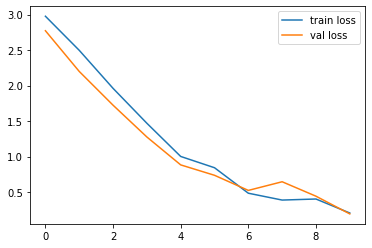

KeyError: ignored

<Figure size 432x288 with 0 Axes>

In [ ]:
# add preprocessing layer to the front of VGG
# vgg = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

# don't train existing weights
# for lay…
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True,
                                  validation_split=0.2)

test_datagen = ImageDataGenerator(rescale = 1./255)
print(test_datagen)

training_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (224, 224),
                                                 batch_size = 12,
                                                 class_mode = 'categorical',
                                                 shuffle=True,
                                                subset='training')
validation_set = train_datagen.flow_from_directory(
    train_path, # same directory as training data
    target_size = (224, 224),
    batch_size=12,
    class_mode = 'categorical',
    subset='validation',
shuffle=True) # set as validation data
# test_set = test_datagen.flow_from_directory('/content/dataset/acc-german-traffic-sign-classification2/GTSRB_Challenge/test',
#                                             target_size = (224, 224),
#                                             batch_size = 12,
#                                             class_mode = 'categorical')

'''r=model.fit_generator(training_set,
                         samples_per_epoch = 8000,
                         nb_epoch = 5,
                         validation_data = test_set,
                         nb_val_samples = 2000)'''

# fit the model
r = model.fit(
  training_set,
  validation_data=validation_set,
  epochs=10,
  # steps_per_epoch=len(training_set),
  validation_steps=12
)
# loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# # accuracies
plt.plot(r.history['train_acc'], label='train acc')
plt.plot(r.history['val_acc'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

import tensorflow as tf

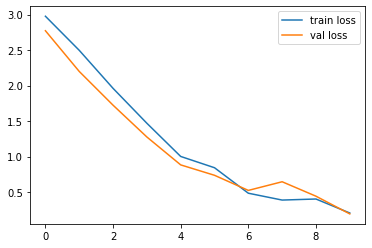

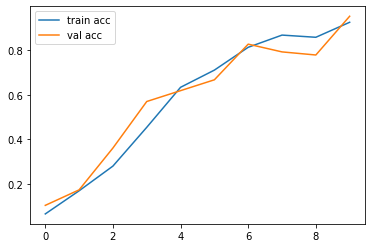

<Figure size 432x288 with 0 Axes>

In [ ]:
# loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# # accuracies
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

import tensorflow as tf

In [ ]:
from tensorflow.keras.models import load_model

model.save('signal_model2.h5')

In [ ]:
!pip install Flask
!pip install SQLAlchemy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from __future__ import division, print_function
# coding=utf-8
import sys
import os
import glob
import re
import numpy as np
import tensorflow as tf
import tensorflow as tf

# Keras
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

# Flask utils
from flask import Flask, redirect, url_for, request, render_template
from werkzeug.utils import secure_filename
#from gevent.pywsgi import WSGIServer

# Define a flask app
app = Flask(__name__)

# Model saved with Keras model.save()
MODEL_PATH ='/content/signal_model2.h5'

# Load your trained model
model = load_model(MODEL_PATH)

classes = { 0:'No passing',
            1:'No passing veh over 3.5 tons',
            2:'Right-of-way at intersection',
            3:'Priority road',
            4:'Yield',
            5:'Stop',
            6:'Vehicle > 3.5 tons prohibited',
            7:'No entry',
            8:'General caution',
            9:'Dangerous curve left',
            10:'Dangerous curve right',
            11:'Bumpy road',
            12:'Slippery road',
            13:'Road narrows on the right',
            14:'Road work',
            15:'Traffic signals',
            16:'Pedestrians',
            17:'End speed + passing limits',
            18:'Go straight or left',
            19:'End of no passing',
            20:'End no passing vehicle > 3.5 tons' }


def model_predict(img_path, model):
    print(img_path)
    img = image.load_img(img_path, target_size=(224, 224))

    # Preprocessing the image
    x = image.img_to_array(img)
    x = np.expand_dims(x,axis=0)
    images=np.vstack([x])
    val=model.predict(images)
    value=val[0]
    if 1 not in val[0]:
        print("No data present")
    else:
        print("image is of :   ", classes[np.where(value==1)[0][0]])
        string = "image is of  " + str(classes[np.where(value==1)[0][0]])

    return string


@app.route('/', methods=['GET'])
def index():
    # Main page
    return render_template('index.html')


@app.route('/predict', methods=['GET', 'POST'])
def upload():
    if request.method == 'POST':
        # Get the file from post request
        f = request.files['file']

        # Save the file to ./uploads
        basepath = os.path.dirname(__file__)
        file_path = os.path.join(
            basepath, 'uploads', secure_filename(f.filename))
        f.save(file_path)

        # Make prediction
        preds = model_predict(file_path, model)
        result=preds
        return result
    return None


if __name__ == '__main__':
    app.run(port=5001,debug=True)

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


OSError: ignored

In [ ]:
from __future__ import division, print_function
# coding=utf-8
import sys
import os
import glob
import re
import numpy as np
import tensorflow as tf
import tensorflow as tf

# Keras
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

# Flask utils
from flask import Flask, redirect, url_for, request, render_template
from werkzeug.utils import secure_filename
#from gevent.pywsgi import WSGIServer

# Define a flask app
app = Flask(__name__)

# Model saved with Keras model.save()
MODEL_PATH ='C:/Users/91700/dl deploy/signal_model2.h5'

# Load your trained model
model = load_model(MODEL_PATH)

classes = { 0:'No passing',
            1:'No passing veh over 3.5 tons',
            2:'Right-of-way at intersection',
            3:'Priority road',
            4:'Yield',
            5:'Stop',
            6:'Vehicle > 3.5 tons prohibited',
            7:'No entry',
            8:'General caution',
            9:'Dangerous curve left',
            10:'Dangerous curve right',
            11:'Bumpy road',
            12:'Slippery road',
            13:'Road narrows on the right',
            14:'Road work',
            15:'Traffic signals',
            16:'Pedestrians',
            17:'End speed + passing limits',
            18:'Go straight or left',
            19:'End of no passing',
            20:'End no passing vehicle > 3.5 tons' }


def model_predict(img_path, model):
    print(img_path)
    img = image.load_img(img_path, target_size=(224, 224))

    # Preprocessing the image
    x = image.img_to_array(img)
    x = np.expand_dims(x,axis=0)
    images=np.vstack([x])
    val=model.predict(images)
    value=val[0]
    if 1 not in val[0]:
        print("No data present")
    else:
        print("image is of :   ", classes[np.where(value==1)[0][0]])
        string = "image is of  " + str(classes[np.where(value==1)[0][0]])

    return string


@app.route('/', methods=['GET'])
def index():
    # Main page
    return render_template('index.html')


@app.route('/predict', methods=['GET', 'POST'])
def upload():
    if request.method == 'POST':
        # Get the file from post request
        f = request.files['file']

        # Save the file to ./uploads
        basepath = os.path.dirname(__file__)
        file_path = os.path.join(
            basepath, 'uploads', secure_filename(f.filename))
        f.save(file_path)

        # Make prediction
        preds = model_predict(file_path, model)
        result=preds
        return result
    return None


if __name__ == '__main__':
    app.run(port=5001,debug=True)